# <a id='toc1_'></a>[**Seminar**: Topics in Sovereign Debt](#toc0_)
## <a id='toc1_1_'></a>[**Soveriegn Debt and Income:** New Evidence for Low- and Middle-Income African Countries](#toc0_)

This project aims to create a dynamic threshold model to analyze when a country's debt starts to hamper growth in GDP. 


**Table of contents**<a id='toc0_'></a>    
- [**Seminar**: Topics in Sovereign Debt](#toc1_)    
  - [**Soveriegn Debt and Income:** New Evidence for Low- and Middle-Income African Countries](#toc1_1_)    
    - [1. Exploratory Data Analysis (EDA)](#toc1_1_1_)    
      - [Descriptive Statistics](#toc1_1_1_1_)    
      - [Visualizations](#toc1_1_1_2_)    
      - [Dynamic Exploratory Data Analysis](#toc1_1_1_3_)    
    - [2. Baseline Model](#toc1_1_2_)    
    - [3. Nonlinearity Check](#toc1_1_3_)    
    - [4.Dynamic Threshold Model](#toc1_1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_1_'></a>[1. Exploratory Data Analysis (EDA)](#toc0_)
- Descriptive statistics
- Data visualization
- Dynamic exploratory data analysis

In [ ]:
## Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For advanced visualizations
import numpy as np

def load_panel_data(file_path):
    """ Loads panel data from CSV, handling potential future changes.

    Args:
        file_path (str): Path to the CSV file.

    Returns:
        pandas.DataFrame: The loaded DataFrame.
    """
    df = pd.read_csv(file_path, sep=";")

    # If column names or structure changes, adapt here:
    df.rename(columns={"old_column": "new_column"}, inplace=True)  
    # ... handle potential future adjustments

    # make all columns after "year" into float values
    df.iloc[:, 2:] = df.iloc[:, 2:].astype(float)

    return df

# Example usage:
data = load_panel_data("angola_data.csv")

#### <a id='toc1_1_1_1_'></a>[Descriptive Statistics](#toc0_)

In [ ]:
def summary_statistics(df, country=None, country_column="Country"):
    """ Provides descriptive statistics with flexibility.
    """
    if country:
        if country not in df[country_column].unique():
            raise ValueError(f"Country '{country}' not found in the dataset.")  
        df = df[df[country_column] == country]

    desc = df.describe().T
    return desc

# Example usage, for Angola:
summary_statistics(data, "Angola")





#### <a id='toc1_1_1_2_'></a>[Visualizations](#toc0_)
Should maybe be adjusted to individual countries. 

In [ ]:
def plot_distribution(df, column):
    """ Plots distribution of a variable. Accepts column name.
    """
    plt.figure(figsize=(8,5)) 
    sns.histplot(data=df, x=column)
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.show()

def plot_scatter(df, x_column, y_column):
    """ Creates a scatter plot between two variables.
    """
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df, x=x_column, y=y_column)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"Relationship between {x_column} and {y_column}")
    plt.show()

# ... You can add functions for line plots, time series if needed


#### <a id='toc1_1_1_3_'></a>[Dynamic Exploratory Data Analysis](#toc0_)

In [ ]:
# Key variables of interest:
key_variables = ['GDP per capita growth rate', 'Debt Ratio to GDP', 'Trade openess', 
                 'inflation', 'Government Effectiveness']  

# Distributions:
for var in key_variables:
    plot_distribution(data, var)

# Correlations (adjust if you want a different matrix):
corr_matrix = data[key_variables].corr()  
sns.heatmap(corr_matrix, annot=True) 
plt.title("Correlation Matrix")
plt.show()

# Example scatterplot:
plot_scatter(data, 'Debt Ratio to GDP', 'GDP per capita growth rate') 


### <a id='toc1_1_2_'></a>[2. Baseline Model](#toc0_)
- Simple OLS regression
- Bulding-blocks for a dynamic threshold model

In [ ]:
import statsmodels.api as sm

# Assuming your variables are in the 'data' DataFrame
model = sm.OLS(data['Real GDP growth annual'], 
               data[['Debt Ratio to GDP', 'Trade openess', 'inflation', 'Government Effectiveness']])  
results = model.fit()
print(results.summary())


# Set the threshold value
x = 0.05

# Check if any p-value is less than x
if any(results.pvalues < x):
    print("There is at least one coefficient with a p-value less than", x)
else:
    print("All coefficients have p-values greater than or equal to", x)


### <a id='toc1_1_3_'></a>[3. Nonlinearity Check](#toc0_)
- Nonlinearity check
- Ramsey Reset


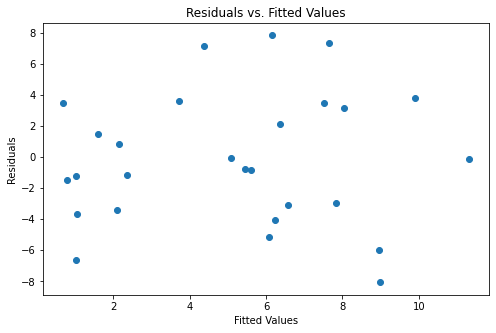

In [97]:
import matplotlib.pyplot as plt

# Fit your baseline linear model from the previous step (if you haven't already)
# ... 

plt.figure(figsize=(8, 5))
plt.scatter(results.fittedvalues, results.resid) 
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


In [104]:
import statsmodels.formula.api as smf

# Assuming your fitted model is in  'results'

# 1. Get base restricted model  (your linear model in this case)
restricted_model = results

# 2. Create a more flexible unrestricted model 
unrestricted_model = smf.ols(formula="Real_GDP_Growth ~ Debt_Ratio_to_GDP + Trade_openess + Inflation + Government_Effectiveness + Debt_Ratio_to_GDP_Squared + I(Debt_Ratio_to_GDP_Squared * Debt_Ratio_to_GDP_Squared)", data=data).fit() 

# 3. Calculate the F-statistic
f_stat = ((restricted_model.ssr - unrestricted_model.ssr) / (unrestricted_model.df_resid - restricted_model.df_resid)) / (restricted_model.ssr / restricted_model.df_resid)

# 4. Calculate the p-value (you'll need scipy)
from scipy.stats import f
p_value = 1 - f.cdf(f_stat, unrestricted_model.df_resid - restricted_model.df_resid, restricted_model.df_resid)

# 5. Print the results
print(f"RESET Test F-statistic: {f_stat}")
print(f"RESET Test p-value: {p_value}") 


RESET Test F-statistic: -1.5746029560053578
RESET Test p-value: nan


### <a id='toc1_1_4_'></a>[4. Dynamic Threshold Model](#toc0_)
- Building the model
- Estimation
- Interpretation

First set possible threshold values. Then estimate the model.

In [111]:
potential_threshold = 60  

In [114]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 

def split_data(data, threshold, target_var):
    data_below = data[data['Debt_Ratio_to_GDP'] <= threshold]
    data_above = data[data['Debt_Ratio_to_GDP'] > threshold]
    return data_below, data_above

threshold_values = np.arange(20, 90, 0.1)  # Range to explore
best_fit = 0  
best_threshold = None

for threshold in threshold_values:
    data_below, data_above = split_data(data, threshold, 'Real_GDP_Growth')

    formula = 'Real_GDP_Growth ~ Debt_Ratio_to_GDP + Trade_openess + Inflation + Government_Effectiveness' # Define the formula string here 

    model_below = smf.ols(formula=formula, data=data_below).fit()
    model_above = smf.ols(formula=formula, data=data_above).fit()

    current_fit = model_below.rsquared + model_above.rsquared  

    if current_fit > best_fit: 
        best_fit = current_fit
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}") 




Best Threshold: 64.30000000000064
